# Homework 1
## Juan Francisco Cisneros

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Assume we implemented an algorithm that has complexity approximately $n log(n)$. How much faster is this implementation compared to one of complexity $n^2$?

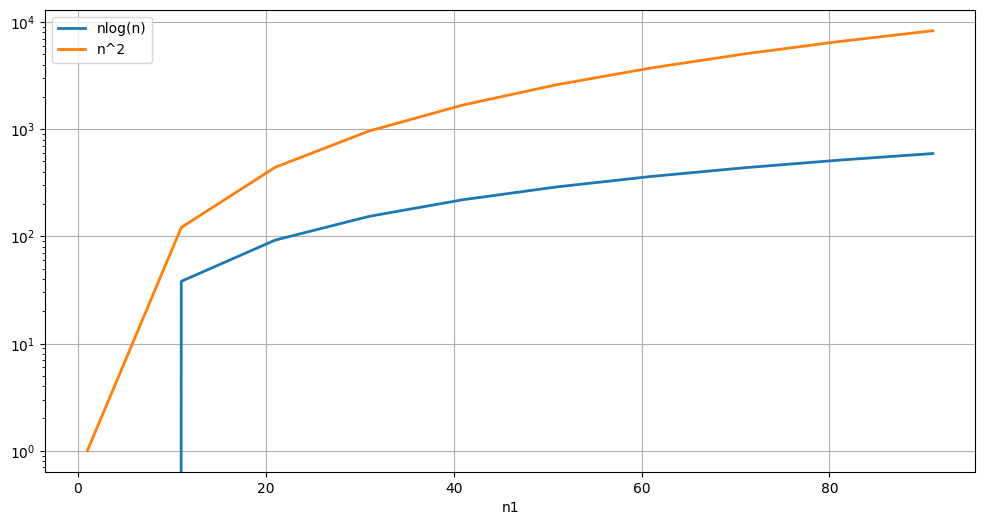

In [2]:
r = pd.DataFrame()#DEFINE THE DATA FRAME

#DEFINE THE X RANGE
r['n1'] = np.arange(1, 100, 10)

#DEFINE THE 2 FUNCTIONS TO SHOW
r['nlog(n)'] = np.arange(1, 100, 10) * np.log2(np.arange(1, 100, 10))
r['n^2'] = np.power(np.arange(1, 100, 10), 2)

#PLOT IN A GRAPH
r.plot(x='n1', logy=True, lw=2, figsize=(12, 6))
plt.grid()

### 2. The runtime of an algorithm is captured in the following table:

As precissely as possible, estimate the function that describes the growth of the runtime 

|$n$  | runtime -- $T(n)$|
|---- | ----- |
|1000|0.0|
|2000|0.02|
|4000|0.2|
|8000|0.6|
|16000|2.6|
|32000|10.4|
|64000|41.6|

In [3]:
#USING THE TABLE TRANSFORM IT INTO TWO LISTS
N = [1000,2000,4000,8000,16000,32000,64000]
T = [0.0,0.02,0.2,0.6,2.6,10.4,41.6]

#ZIP THE DATA INTO A DATAFRAME
df = pd.DataFrame(zip(N,T))
df.columns = ['n', 'T(n)']
df #SHOW THE DATA FRAME

,n,T(n)
0,1000,0.00
1,2000,0.02
2,4000,0.20
3,8000,0.60
4,16000,2.60
5,32000,10.40
6,64000,41.60


<AxesSubplot: title={'center': 'y = 0.0006x-3.7895'}, xlabel='n'>

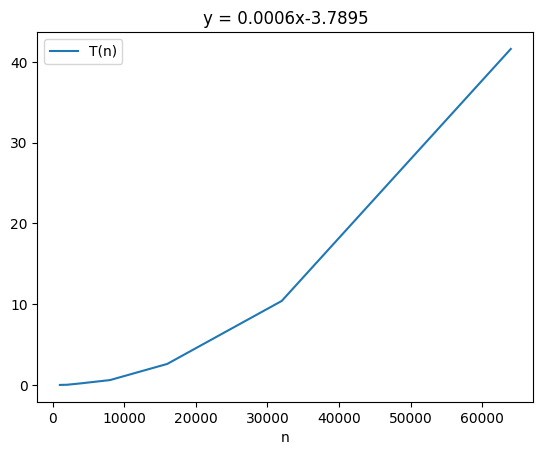

In [4]:
df.plot(x='n', y='T(n)',title = 'y = 0.0006x-3.7895') #USING EXCEL I GOT THE FUNCTION AND USED THE DATA FRAME TO PLOT IT

### 3. By estimating the number of operations as a function of $n$, estimate the complexity of the following function

```
def func1(n):                                   cost   time
    A = range(0,n)                              c1      n
    sum = 0                                     c2      1
    i = 0                                       c3      1
    for x in A[i:]:                             c4      n^2
        i += 1                                  c5      n
        for j in range(i, len(A)):              c6      n-1
            y = A[j]                            c7      n-1
            k = j                               c8      n-1
            while k < len(A):                   c9   \sum_{k=1}^n t_k
                z = A[k]                        c10  \sum_{k=1}^n (t_k-1)
                k = 2*k                         c11  \sum_{k=1}^n (t_k-1)
                if x + y <= z:                  c12  \sum_{k=1}^n (t_k-1)
                    sum += 1                    c13 \sum_{k=1}^n (t_k-1)
    return sum
```

### Total time

 - PRIMERO TENGO EL LOOP A = RANGE(0,N) ESTE LOOP SE CORRE N VECES, COMPLEJIDAD $O(n)$

 - TENGO LAS CONSTANTES sum E i

 - EN ESTE PRIMER FOR LOOP TENGO QUE ESTE SE REPITE $n(n-1)/2$ VECES, CON COMPLEJIDAD $O(n^2)$

 - DENTRO DEL PRIMER FOR LOOP TENGO UN NUEVO LOOP PERO ESTE TIENE COMPLEJIDAD DE $O(n)$

 - DENTRO DE ESTE SEGUNDO LOOP TENGO UN WHILE LOOP CON COMPLEJIDAD $O(log(n))$
 - $O(n^4 log(n))$


### 4. From class, remember the code we use to get the sum of the first $n$ positive integers:

```
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
```

Now consider a different function that does the same thing.

```
def sum2(n): 
    total = n*(n+1)//2
    return total
```

1. Run the two functions and make sure that they return the same outputs. Use $n = 5, 8, 103, 527$
2. Use Python time library to estimate the runtime for inputs of $n = [1, 10, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7, 10^8, 10^9]$
3. Plot the runtime as a function of $n$ for both functions in the same figure. 
    - Use different line colors and markers to help distinguish between the two curves. 
4. Analytically estime the runtime functions for the functions `sum1` and `sum2`. Call them $T_1(n)$ and $T_2(n)$.
    - Note that the times obtained in your computer will be different to the ones shown in class since the speed and memory of the computers used to run the code are likely different
5. How long will it take to run the code for $n = 10^{100}$ using `sum1` and `sum2`? What are your main impressions about the difference?

**Hint:** Use and modify the code from the slides to get and plot the runtime


### LETS IMPLEMENT A PYTHTON DECORATOR FOR METHODS TIME REPORT

In [5]:
from time import time

#https://www.geeksforgeeks.org/timing-functions-with-decorators-python/ <- IMPLEMENTATION FROM, RE WRITTED BY JUAN FRANCISCO CISNEROS
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time()*10**12
        result = func(*args, **kwargs)
        t2 = time()*10**12
        return result , t2-t1
    return wrap_func

### 1. IMPLEMENT THE TWO FUNCTIONS AND MAKE SURE THAT HEY RETURN THE SAME OUTPUT FOR N=5,8,103,527

In [6]:
@timer_func
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total

@timer_func
def sum2(n):
    total = n*(n+1)//2
    return total

In [7]:
#CREATE A LIST WITH THE NUMBERS WE ARE GOING TO RUN THE FUNCTIONS
N = [5, 8, 103,527]

#RUN THE FUNCTION FOR EACH ELEMENT IN N AND ADD IT TO A RESULTS LIST
results1 = [sum1(n) for n in N]
results2 = [sum2(n) for n in N]
print(results1, '    (RESULTS FOR SUM1)')
print(results2, '    (RESULTS FOR SUM2)')

#GETTING ONLY THE RESULTS FROM THE FUNCTION, NOT THE TIME
results1Show = []
results2Show = []
for i in range(len(N)):
    results1Show.append(results1[i][0])
    results2Show.append(results2[i][0])

#DEFINE A DATAFRAME TO SHOW THE NUMBER RESULTS FOR EACH FUNCTION
dfResults1 = pd.DataFrame(zip(N, results1Show))
dfResults1.columns = ['N', 'T(N)']
dfResults2 = pd.DataFrame(zip(N, results2Show))
dfResults2.columns = ['N', 'T(N)']

[(15, 3932160.0), (36, 1310720.0), (5356, 6029312.0), (139128, 31195136.0)]     (RESULTS FOR SUM1)
[(15, 1835008.0), (36, 1048576.0), (5356, 1048576.0), (139128, 1048576.0)]     (RESULTS FOR SUM2)


### THE TWO FUNCTIONS RETURN THE SAME OUTPUT

In [8]:
dfResults1

,N,T(N)
0,5,15
1,8,36
2,103,5356
3,527,139128


In [9]:
dfResults2

,N,T(N)
0,5,15
1,8,36
2,103,5356
3,527,139128


### 2. Use Python time library to estimate the runtime for inputs of $n = [1, 10, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7, 10^8, 10^9]$

In [10]:
#CREATE A LIST WITH THE NUMBERS WE ARE GOING TO RUN THE FUNCTIONS
ntimes = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000,100000000,1000000000]

#RUN THE FUNCTION FOR EACH ELEMENT IN N AND ADD IT TO A RUNTIME LIST
run_time1 = [sum1(n) for n in ntimes]
run_time2 = [sum2(n) for n in ntimes]

In [11]:
#GETTING ONLY THE TIME FROM THE RESULTS TO SHOW
time1 = []
time2 = []
for i in range(len(ntimes)):
    time1.append(run_time1[i][1])
    time2.append(run_time2[i][1])


In [12]:
#SHOWING THE RESULTS FOR THE RUNTIME 1
df1 = pd.DataFrame(zip(ntimes, time1))
df1.columns = ['N', 'T(N)']
df1

,N,T(N)
0,1,6.029312e+06
1,10,5.242880e+05
2,100,9.961472e+06
3,1000,9.804186e+07
4,10000,1.043595e+09
5,100000,1.160407e+10
6,1000000,8.986296e+10
7,10000000,8.401728e+11
8,100000000,1.037121e+13
9,1000000000,8.864231e+13


In [13]:
#SHOWING THE RESULTS FOR THE RUNTIME 1
df2 = pd.DataFrame(zip(ntimes, time2))
df2.columns = ['N', 'T(N)']
df2

,N,T(N)
0,1,2097152.0
1,10,786432.0
2,100,0.0
3,1000,0.0
4,10000,0.0
5,100000,0.0
6,1000000,0.0
7,10000000,0.0
8,100000000,0.0
9,1000000000,0.0


### 3. Plot the runtime as a function of $n$ for both functions in the same figure.
        - Use different line colors and markers to help distinguish between the two curves.

In [14]:
df3 = pd.DataFrame(zip(ntimes,time1,time2))
df3.columns = ['N', 'SUM1 T(N)', 'SUM2 T(N)']
df3

,N,SUM1 T(N),SUM2 T(N)
0,1,6.029312e+06,2097152.0
1,10,5.242880e+05,786432.0
2,100,9.961472e+06,0.0
3,1000,9.804186e+07,0.0
4,10000,1.043595e+09,0.0
5,100000,1.160407e+10,0.0
6,1000000,8.986296e+10,0.0
7,10000000,8.401728e+11,0.0
8,100000000,1.037121e+13,0.0
9,1000000000,8.864231e+13,0.0


<AxesSubplot: xlabel='N'>

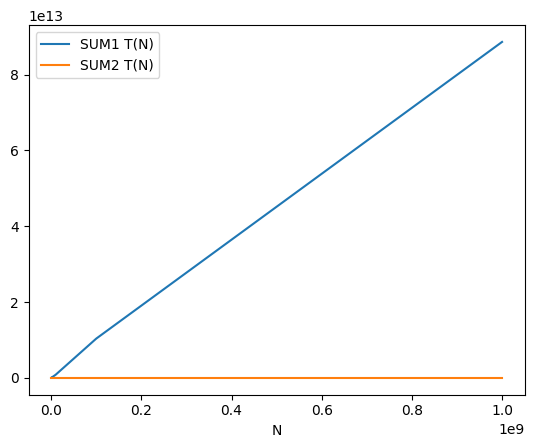

In [15]:
df3.plot(x='N')

### 4. Analytically estime the runtime functions for the functions `sum1` and `sum2`. Call them $T_1(n)$ and $T_2(n)$.
        - Note that the times obtained in your computer will be different to the ones shown in class since the speed and memory of the computers used to run the code are likely different
### 5. How long will it take to run the code for $n = 10^{100}$ using `sum1` and `sum2`? What are your main impressions about the difference?


# FOR SUM1() WE HAVE A
> $O(n)$

> $y=6x10^6x - 2x10^7 = 6x10^{106} ;  x = 10^{100}$

# FOR SUM2() WE HAVE A
> $O(1)$

> $y= 7x10^{-9}x + 1.2 = 7x10^{91}; x=10^{100}$


### 5. Prove that the running time of an algorithm is $\Theta(g(n))$ if and only if its worst-case running time is $O(g(n))$ and its best-case running time is $\Omega(g(n))$

Asumiendo que el tiempo de ejecucion es T(n)
Si $ T(n) =  \Omega(g(n))$, entonces para n>= n0,
> $0 <= c1g(n) < T(n) < c2g(n)$

El worst case running time es $O(n)$
El best case running time es $\Omega(n)$

### 6.  Sort the following functions in decreasing order of asymptotic complexity ($O(f(n))$):

- $f_1(n) = \sqrt{n}$
- $f_2(n) = n^3$
- $f_3(n) = {n\choose 4}$
- $f_4(n) = \sum_{i=2}^n (i-1)$

<img src="../homework_1/images/excel2.png"/>

<img src="../homework_1/images/excel1.png"/>

- $f_3(n) = {n\choose 4}$
- $f_2(n) = n^3$
- $f_4(n) = \sum_{i=2}^n (i-1)$
- $f_1(n) = \sqrt{n}$

### 7. Implement the methods of the class `Array` that deal with deletion of elements. Consider the 3 cases we considered in class.

In [16]:
import ctypes

class Array(object):
    """
    Implementation of the array data structure
    """

    def __init__(self, n):
        """
        Initialize the class
        """
        self.l = 0
        self.n = n
        self.array = self._create_array(self.n)

    def _create_array(self, n):
        """
        Creates a new array of capacity n
        """
        return (n * ctypes.py_object)()

    def __getitem__(self, item_index):
        """
        Return element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        try:
            x = self.array[item_index]
        except ValueError:
            x = None
        return x

    def __setitem__(self, item_index, item):
        """
        Set element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        self.array[item_index] = item

    def __init__(self, n, values=None):
        self.l = 0
        self.n = n
        self.array = self._create_array(self.n)
        if values:
            self.initialize_array(values)

    def initialize_array(self, values):
        """
        Initialize array
        """
        if self.n != len(values):
            raise ValueError("element count different than capacity")
        for item in values:
            self.array[self.l] = item
            self.l += 1

    def list_array(self):
        """
        List elements of the array
        using list comprehension
        """
        return ", ".join(str(x) if x is not None else '_' for x in self)

    def list_array2(self):
        y = []
        for x in self:
            if x is not None:
                y.append(str(x))
            else:
                y.append('_')
        return ", ".join(y)

    def insert_to_tail(self, item):
        """
        Add new item to the tail of the array
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        self.array[self.l] = item
        self.l += 1

    def insert_to_head(self, item):
        """
        Add new item to the beginning of the array
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        i = self.l
        while (i > 0):
            self.array[i] = self.array[i-1]
            i -= 1
        self.array[0] = item
        self.l += 1

    def insert(self, index, element):
        """
        implementation of insert
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        if (index < 0) or (index > self.l):
            raise IndexError('index out of range!')
        x = self.l
        while x > index:
            self.array[x] = self.array[x-1]
            x -= 1
        self.array[index] = element
        self.l += 1

# ADDING DELETE FUNCTIONALITY

In [17]:
class Array(Array):
    def delete_last_item(self):
        """
        Delete last item of the array
        """
        self.array[self.l-1] = None
        self.l -= 1

    def delete_first_item(self):
        """
        Delete first item of the array
        """
        self.array[self.l] = None
        i=0
        while (i!=self.l):
            try:
                self.array[i] = self.array[i+1]
                i+=1
            except:
                return
        self.l -=1


    def delete_using_index(self,index):
        """
        Delete item given by a certain index
        """
        self.array[index] = None
        i=index
        while (i!=self.l):
            try:
                self.array[i] = self.array[i+1]
                i+=1
            except:
                self.array[self.l-1] = None
                self.l -=1
                return
        self.l -=1

# DELETE THE LAST ITEM FROM THE ARRAY

In [18]:
a = Array(5)
a.insert(0,'juan')
a.insert(1,'juan2')
a.insert(2,'juan3')
print(a.list_array(), '   (FIRST ARRAY)')
a.delete_last_item()
print(a.list_array(), '   (DELETING THE LAST ITEM)')

juan, juan2, juan3, _, _    (FIRST ARRAY)
juan, juan2, _, _, _    (DELETING THE LAST ITEM)


# DELETE THE FIRST ITEM FROM ARRAY

In [19]:
print(a.list_array(), '   (FIRST ARRAY)')
a.delete_first_item()
print(a.list_array(),'   (DELETING FISRT ITEM)')

juan, juan2, _, _, _    (FIRST ARRAY)
juan2, _, _, _, _    (DELETING FISRT ITEM)


# DELETE USING INDEX NOT EQUALS 0

In [20]:
a.insert(1,'francisco')
a.insert(2,'cisneros')
a.insert(3,'guzman')
a.insert(4,'usfq')
print(a.list_array(), '   (FIRST ARRAY)'),
a.delete_using_index(2)
print(a.list_array(), '   (DELETE ITEM WHEN INDEX NOT EQUALS 0)')

juan2, francisco, cisneros, guzman, usfq    (FIRST ARRAY)
juan2, francisco, guzman, usfq, _    (DELETE ITEM WHEN INDEX NOT EQUALS 0)


# DELETE USING INDEX EQUALS 0

In [21]:
print(a.list_array(), '   (FIRST ARRAY)'),
a.delete_using_index(0)
print(a.list_array(), '    (DELETE ITEM WHEN INDEX IS 0)')

juan2, francisco, guzman, usfq, _    (FIRST ARRAY)
francisco, guzman, usfq, _, _     (DELETE ITEM WHEN INDEX IS 0)
